In [ ]:
%cd /content/drive/MyDrive/txt_to_image

/content/drive/MyDrive/txt_to_image


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/runwayml/stable-diffusion.git

Cloning into 'stable-diffusion'...
remote: Enumerating objects: 385, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 385 (delta 23), reused 19 (delta 19), pack-reused 353
Receiving objects: 100% (385/385), 47.62 MiB | 20.82 MiB/s, done.
Resolving deltas: 100% (158/158), done.
Updating files: 100% (138/138), done.


In [2]:
%cd /content/drive/MyDrive/txt_to_image/stable-diffusion

/content/drive/MyDrive/txt_to_image/stable-diffusion


In [ ]:
!wget https://repo.anaconda.com/archive/Anaconda3-2023.03-Linux-x86_64.sh

--2023-04-07 01:31:56--  https://repo.anaconda.com/archive/Anaconda3-2023.03-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 901858012 (860M) [application/x-sh]
Saving to: ‘Anaconda3-2023.03-Linux-x86_64.sh’

Anaconda3-2023.03-L 100%[===================>] 860.08M  65.7MB/s    in 13s     

2023-04-07 01:32:09 (64.8 MB/s) - ‘Anaconda3-2023.03-Linux-x86_64.sh’ saved [901858012/901858012]



In [ ]:
!chmod +x Anaconda3-2023.03-Linux-x86_64.sh
!bash ./Anaconda3-2023.03-Linux-x86_64.sh -b -f -p /usr/local

In [ ]:
!conda env create -f environment.yaml
!conda activate ldm

In [3]:
# !conda install pytorch torchvision -c pytorch
!pip install transformers==4.19.2 diffusers invisible-watermark
!pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 KB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 89.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 KB 11.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/MyDrive/txt_to_image/stable-diffusion
  Preparing 

In [ ]:
!wget https://huggingface.co/compvis

In [7]:
!wget https://huggingface.co/CompVis/stable-diffusion-v-1-4-original/resolve/main/sd-v1-4.ckpt

--2023-04-07 10:27:32--  https://huggingface.co/CompVis/stable-diffusion-v-1-4-original/resolve/main/sd-v1-4.ckpt
Resolving huggingface.co (huggingface.co)... 13.227.219.41, 13.227.219.125, 13.227.219.105, ...
Connecting to huggingface.co (huggingface.co)|13.227.219.41|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/4c/37/4c372b4ebb57bbd02e68413d4951aa326d4b3cfb6e62db989e529c6d4b26fb21/fe4efff1e174c627256e44ec2991ba279b3816e364b49f9be2abc0b3ff3f8556?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27sd-v1-4.ckpt%3B+filename%3D%22sd-v1-4.ckpt%22%3B&Expires=1681122228&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9jZG4tbGZzLmh1Z2dpbmdmYWNlLmNvL3JlcG9zLzRjLzM3LzRjMzcyYjRlYmI1N2JiZDAyZTY4NDEzZDQ5NTFhYTMyNmQ0YjNjZmI2ZTYyZGI5ODllNTI5YzZkNGIyNmZiMjEvZmU0ZWZmZjFlMTc0YzYyNzI1NmU0NGVjMjk5MWJhMjc5YjM4MTZlMzY0YjQ5ZjliZTJhYmMwYjNmZjNmODU1Nj9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPSoiLCJDb25kaXRpb24iOnsiRGF0ZUxlc

In [ ]:
!wget https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt

In [ ]:
!mkdir -p models/ldm/stable-diffusion-v1/

In [ ]:
!wget https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-5-pruned.ckpt

In [4]:
!pip install omegaconf
!pip install einops
!pip install pytorch_lightning==1.7.7
!pip install diffusers==0.12.1
!pip install -U torchtext
!pip install clip
!pip install kornia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144573 sha256=88f270f8f7f614f8d730af90b70da710c00243c6054fd053d39a3b41f03b7bcc
  Stored in directory: /root/.cache/pip/wheels/23/cf/80/f3efa822e6ab23277902ee9165fe772eeb1dfb8014f359020a
Successfully built antlr4-python3-runtime


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 2.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 708.1/708.1 KB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 9.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 604.0/604.0 KB 21.8 MB/s eta 0:00:00
  Attempting uninstall: diffusers
    Found existing insta

In [12]:
!python scripts/txt2img.py --prompt "a photograph of an astronaut riding a horse" 

2023-04-07 10:36:56.821645: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-07 10:36:58.431878: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Global seed set to 42
Loading model from models/ldm/stable-diffusion-v1/model.ckpt
Global Step: 470000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Downloading: 100% 939k/939k [00:00<00:00, 40.1MB/s]
Downloading: 100% 512k/512k [00:00<00:00, 6.12MB/s]
Downloading: 100% 389/389 [00:00<00:00, 292kB/s]
Downloading: 100% 905/905 [00:00<00:00, 746k

In [ ]:
!pip install imwatermark

!pip install taming-transformers

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


  0%|          | 0/50 [00:00<?, ?it/s]

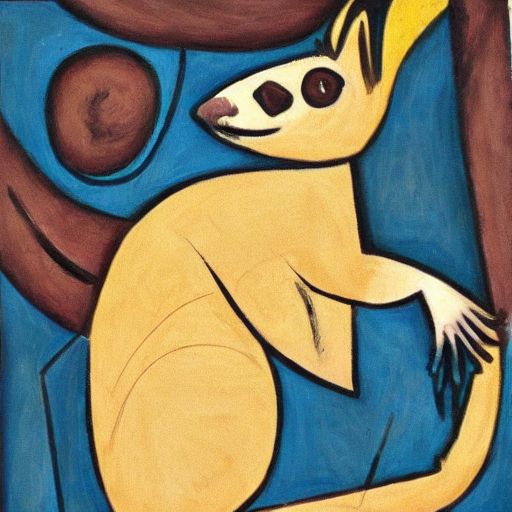

In [13]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipeline.to("cuda")
pipeline("An image of a squirrel in Picasso style").images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

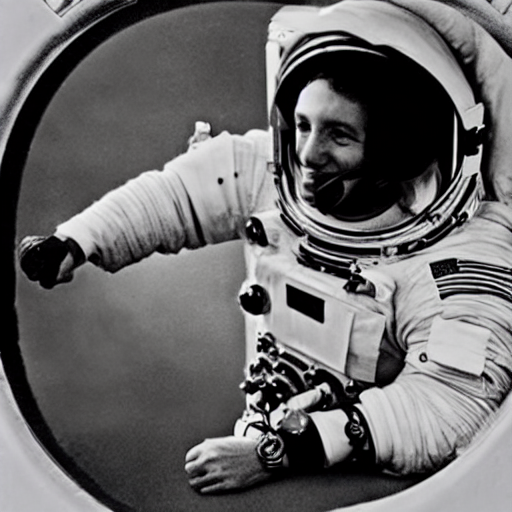

In [14]:
pipeline("a photograph of an astronaut riding a horse").images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

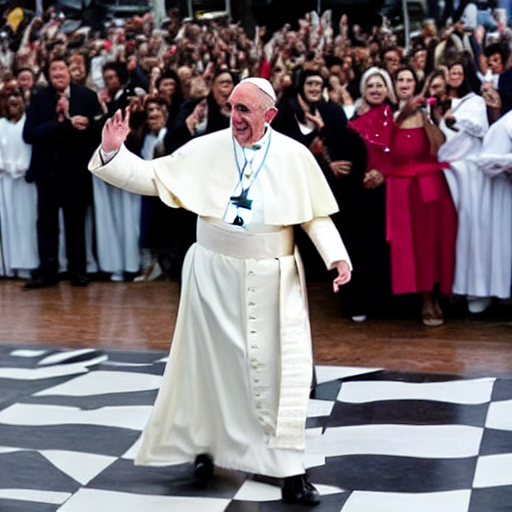

In [15]:
pipeline("pope francis dancing").images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

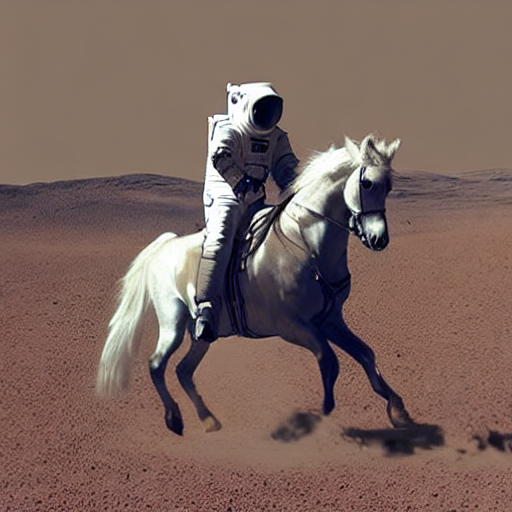

In [16]:
pipeline("a photo of an astronaut riding a horse on mars").images[0]

In [23]:
pipeline("man lost in vally").images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

OutOfMemoryError: ignored

In [ ]:
from taming.modules.vqvae.quantize import VectorQuantizer2 as VectorQuantizer

## Enable cuDNN auto-tuner

In [17]:
import torch

torch.backends.cudnn.benchmark = True

In [18]:
import torch

torch.backends.cuda.matmul.allow_tf32 = True

In [20]:
from diffusers import StableDiffusionPipeline

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5"
)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]

In [ ]:
# !conda install -c conda-forge pytorch-lightning==1.7.7

In [ ]:
import pytorch_lightning
print(pytorch_lightning.__version__)


1.7.7


In [ ]:
from pytorch_lightning.utilities.distributed import rank_zero_only


In [ ]:
from pytorch_lightning.utilities.distributed import rank_zero_only

@rank_zero_only
def print_only_on_rank_zero(msg):
    print(f"This will only be printed by the process with rank 0: {msg}")

print_only_on_rank_zero("Hello, world!")


This will only be printed by the process with rank 0: Hello, world!


In [ ]:
!pip install --upgrade diffusers[flax]

In [ ]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipeline.to("cuda")
pipeline("An image of a squirrel in Picasso style").images[0]

In [ ]:
!conda env create -f environment.yaml
!conda activate ldm

/bin/bash: conda: command not found
/bin/bash: conda: command not found


In [ ]:
!wget https://repo.anaconda.com/archive/Anaconda3-2023.03-Linux-x86_64.sh

In [ ]:
import pytorch_lightning

ModuleNotFoundError: ignored